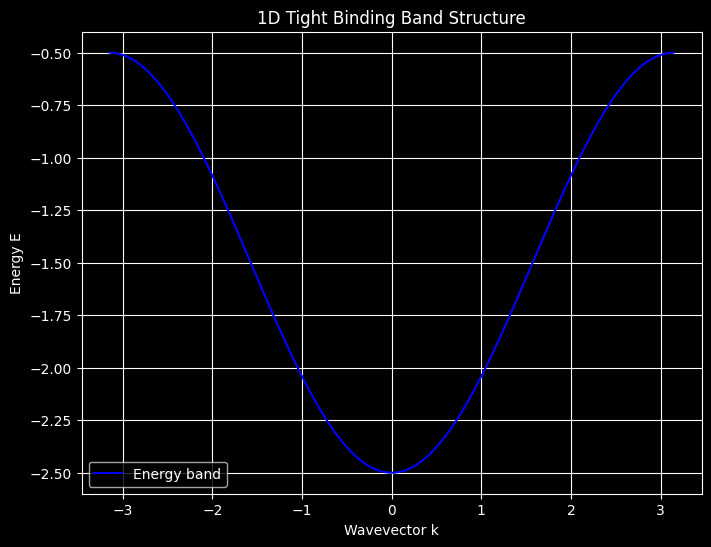

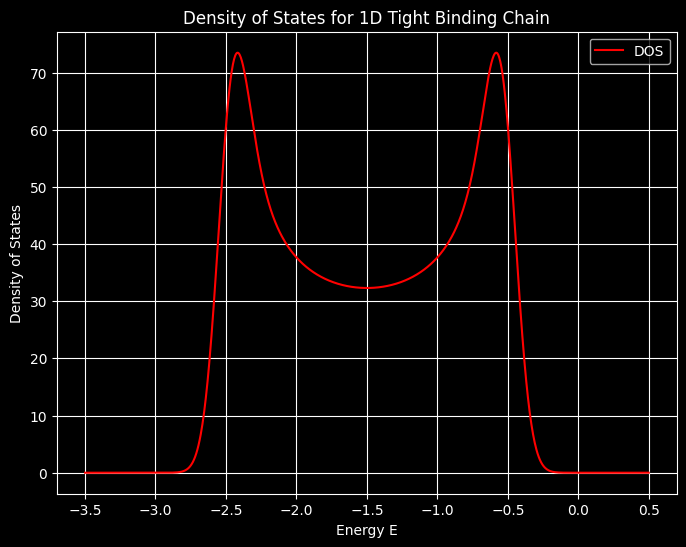

Number of energy levels: 100
Minimum energy: -2.500
Maximum energy: -0.500


In [8]:
import numpy as np
import matplotlib.pyplot as plt

class TightBindingChain:
    """
    A simple 1D tight binding model representing a chain of atoms.
    This demonstrates the basic concepts of tight binding theory.
    """
    
    def __init__(self, num_sites, hopping_strength=-1.0, onsite_energy=0.0):
        """
        Initialize the tight binding chain.
        
        Parameters:
        -----------
        num_sites : int
            Number of atoms in the chain
        hopping_strength : float
            Strength of electron hopping between neighboring sites (t)
        onsite_energy : float
            Energy of electron when it sits on an atom (ε)
        """
        self.num_sites = num_sites
        self.t = hopping_strength
        self.e = onsite_energy
        
        # Build the Hamiltonian matrix
        self.hamiltonian = self._build_hamiltonian()
    
    def _build_hamiltonian(self):
        """
        Construct the tight binding Hamiltonian matrix.
        H[i,i] = onsite energy
        H[i,i±1] = hopping energy
        """
        H = np.zeros((self.num_sites, self.num_sites))
        
        # Set diagonal elements (onsite energies)
        np.fill_diagonal(H, self.e)
        
        # Set off-diagonal elements (hopping terms)
        # Upper diagonal
        np.fill_diagonal(H[:-1, 1:], self.t)
        # Lower diagonal (symmetric)
        np.fill_diagonal(H[1:, :-1], self.t)
        
        return H
    
    def solve(self):
        """
        Solve the tight binding model to get energies and wavefunctions.
        
        Returns:
        --------
        energies : array
            Energy eigenvalues
        states : array
            Eigenvectors (wavefunctions)
        """
        return np.linalg.eigh(self.hamiltonian)
    
    def plot_bands(self, k_points=100):
        """
        Plot the energy bands for the tight binding model.
        
        Parameters:
        -----------
        k_points : int
            Number of k-points to plot
        """
        # Calculate analytical band structure for 1D chain
        k = np.linspace(-np.pi, np.pi, k_points)
        E = 2 * self.t * np.cos(k) + self.e
        
        plt.figure(figsize=(8, 6))
        plt.plot(k, E, 'b-', label='Energy band')
        plt.xlabel('Wavevector k')
        plt.ylabel('Energy E')
        plt.title('1D Tight Binding Band Structure')
        plt.grid(True)
        plt.legend()
        plt.show()
    
    def plot_density_of_states(self, energies, broadening=0.1, num_points=1000):
        """
        Calculate and plot the density of states.
        
        Parameters:
        -----------
        energies : array
            Energy eigenvalues
        broadening : float
            Energy broadening for smoothing
        num_points : int
            Number of points for DOS calculation
        """
        E = np.linspace(min(energies)-1, max(energies)+1, num_points)
        DOS = np.zeros_like(E)
        
        # Calculate DOS using Gaussian broadening
        for e in energies:
            DOS += np.exp(-(E - e)**2 / (2 * broadening**2))
        DOS /= np.sqrt(2 * np.pi * broadening**2)
        
        plt.figure(figsize=(8, 6))
        plt.plot(E, DOS, 'r-', label='DOS')
        plt.xlabel('Energy E')
        plt.ylabel('Density of States')
        plt.title('Density of States for 1D Tight Binding Chain')
        plt.grid(True)
        plt.legend()
        plt.show()

# Example usage
def demonstrate_tight_binding():
    # Create a chain of 100 atoms
    chain = TightBindingChain(num_sites=100, hopping_strength=-0.5, onsite_energy=-1.5)
    
    # Solve for energies and wavefunctions
    energies, states = chain.solve()
    
    # Plot band structure
    chain.plot_bands()
    
    # Plot density of states
    chain.plot_density_of_states(energies)
    
    # Print some basic information
    print(f"Number of energy levels: {len(energies)}")
    print(f"Minimum energy: {min(energies):.3f}")
    print(f"Maximum energy: {max(energies):.3f}")
    
    return chain, energies, states

if __name__ == "__main__":
    chain, energies, states = demonstrate_tight_binding()

/tmp/ipykernel_68740/283219583.py:43: RuntimeWarning: divide by zero encountered in power
  1/(np.pi * np.sqrt(2*m)) * energy**(-1/2),
/tmp/ipykernel_68740/283219583.py:77: RuntimeWarning: invalid value encountered in sqrt
  1/(np.pi * np.sqrt(4*t**2 - energy**2)),


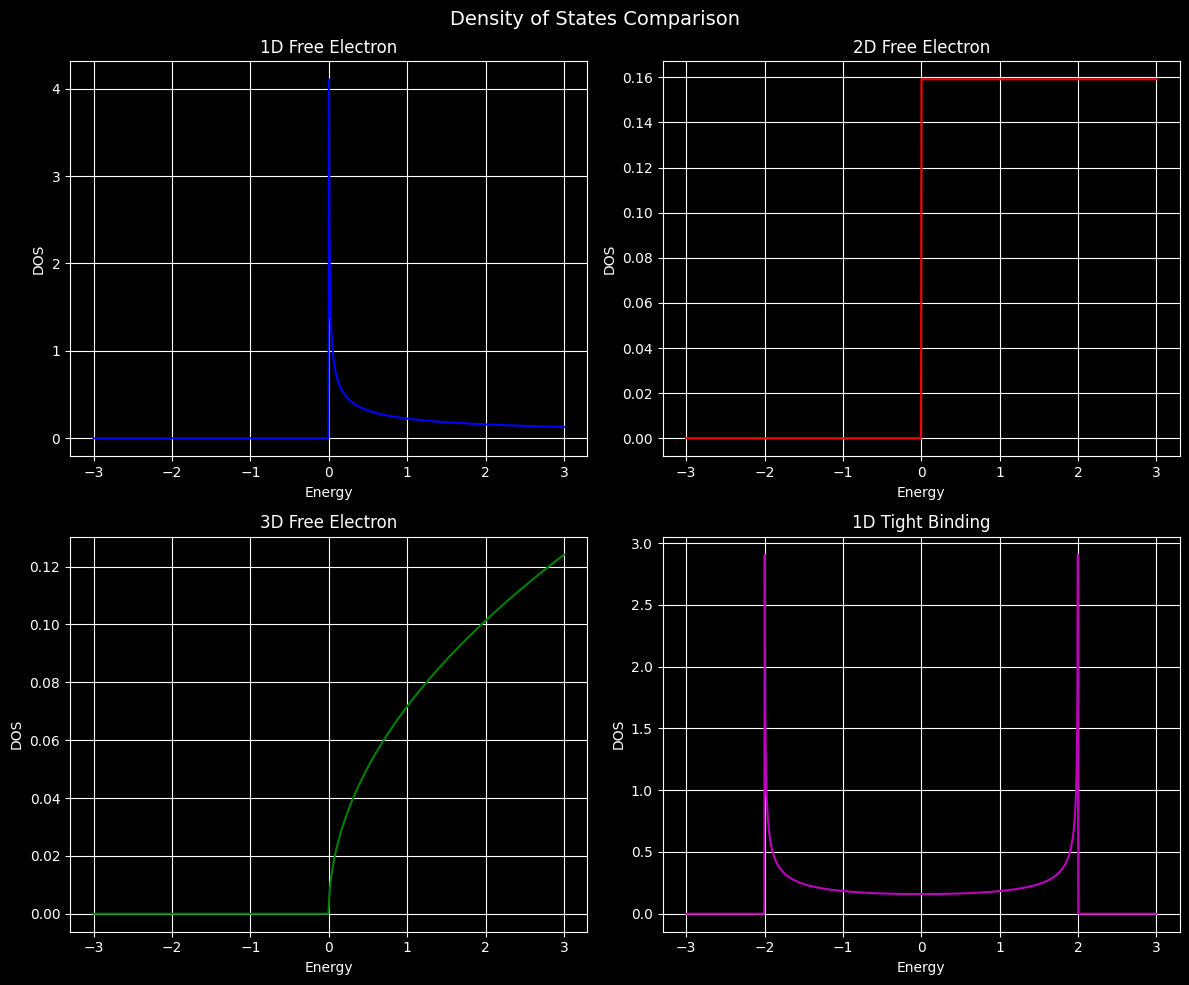


Calculated Fermi level: -0.723

Key insights about DOS:
1. DOS peaks indicate energy regions with many available states
2. DOS = 0 indicates forbidden energy regions (band gaps)
3. DOS shape depends on material dimensionality and structure
4. DOS determines many material properties:
   - Electrical conductivity
   - Optical absorption
   - Heat capacity


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

class DensityOfStates:
    """
    Class for calculating and visualizing Density of States (DOS)
    for different material models.
    """
    
    def __init__(self):
        self.energy_range = None
        self.dos = None
        
    def free_electron_dos(self, energy, effective_mass=1.0, dim=3):
        """
        Calculate DOS for free electron gas in different dimensions.
        
        Parameters:
        -----------
        energy : array
            Energy values
        effective_mass : float
            Effective mass in units of electron mass
        dim : int
            Dimensionality (1, 2, or 3)
            
        Returns:
        --------
        dos : array
            Density of states
        """
        # Constants
        hbar = 1.0  # Using atomic units
        m = effective_mass
        
        # Ensure energy is non-negative
        energy = np.maximum(energy, 0)
        
        if dim == 1:
            # 1D: DOS ∝ E^(-1/2)
            return np.where(energy > 0, 
                          1/(np.pi * np.sqrt(2*m)) * energy**(-1/2),
                          0)
        elif dim == 2:
            # 2D: DOS is constant
            return np.where(energy > 0,
                          m/(2*np.pi),
                          0)
        elif dim == 3:
            # 3D: DOS ∝ E^(1/2)
            return np.where(energy > 0,
                          m**1.5 * np.sqrt(2*energy)/(2*np.pi**2),
                          0)
        else:
            raise ValueError("Dimension must be 1, 2, or 3")
    
    def tight_binding_dos_1d(self, energy, hopping=-1.0):
        """
        Calculate DOS for 1D tight binding chain.
        
        Parameters:
        -----------
        energy : array
            Energy values
        hopping : float
            Hopping parameter
            
        Returns:
        --------
        dos : array
            Density of states
        """
        t = abs(hopping)
        # DOS has peaks at band edges
        return np.where(abs(energy) <= 2*t,
                       1/(np.pi * np.sqrt(4*t**2 - energy**2)),
                       0)
    
    def calculate_dos_from_energies(self, energies, energy_range=None, 
                                  broadening=0.1, num_points=1000):
        """
        Calculate DOS from a set of energy eigenvalues using Gaussian broadening.
        
        Parameters:
        -----------
        energies : array
            Energy eigenvalues
        energy_range : tuple
            (min_energy, max_energy) for DOS calculation
        broadening : float
            Width of Gaussian broadening
        num_points : int
            Number of points for DOS calculation
        """
        if energy_range is None:
            e_min = min(energies) - 3*broadening
            e_max = max(energies) + 3*broadening
            energy_range = (e_min, e_max)
            
        self.energy_range = np.linspace(energy_range[0], energy_range[1], num_points)
        self.dos = np.zeros_like(self.energy_range)
        
        # Add Gaussian for each energy level
        for e in energies:
            self.dos += np.exp(-(self.energy_range - e)**2 / (2 * broadening**2))
            
        # Normalize
        self.dos /= (np.sqrt(2 * np.pi) * broadening)
        
    def plot_dos_comparison(self):
        """
        Plot and compare DOS for different models.
        """
        # Energy range
        energy = np.linspace(-3, 3, 1000)
        
        # Calculate different DOS
        dos_1d_free = self.free_electron_dos(energy, dim=1)
        dos_2d_free = self.free_electron_dos(energy, dim=2)
        dos_3d_free = self.free_electron_dos(energy, dim=3)
        dos_1d_tb = self.tight_binding_dos_1d(energy)
        
        # Plotting
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        fig.suptitle('Density of States Comparison', fontsize=14)
        
        # 1D Free electron
        axes[0,0].plot(energy, dos_1d_free, 'b-')
        axes[0,0].set_title('1D Free Electron')
        axes[0,0].set_xlabel('Energy')
        axes[0,0].set_ylabel('DOS')
        axes[0,0].grid(True)
        
        # 2D Free electron
        axes[0,1].plot(energy, dos_2d_free, 'r-')
        axes[0,1].set_title('2D Free Electron')
        axes[0,1].set_xlabel('Energy')
        axes[0,1].set_ylabel('DOS')
        axes[0,1].grid(True)
        
        # 3D Free electron
        axes[1,0].plot(energy, dos_3d_free, 'g-')
        axes[1,0].set_title('3D Free Electron')
        axes[1,0].set_xlabel('Energy')
        axes[1,0].set_ylabel('DOS')
        axes[1,0].grid(True)
        
        # 1D Tight binding
        axes[1,1].plot(energy, dos_1d_tb, 'm-')
        axes[1,1].set_title('1D Tight Binding')
        axes[1,1].set_xlabel('Energy')
        axes[1,1].set_ylabel('DOS')
        axes[1,1].grid(True)
        
        plt.tight_layout()
        plt.show()
        
    def calculate_fermi_level(self, num_electrons, temperature=0.0):
        """
        Calculate Fermi level given number of electrons.
        
        Parameters:
        -----------
        num_electrons : int
            Number of electrons
        temperature : float
            Temperature in energy units
            
        Returns:
        --------
        fermi_level : float
            Fermi energy
        """
        if self.energy_range is None or self.dos is None:
            raise ValueError("Must calculate DOS first")
            
        def electron_number(ef):
            # Fermi-Dirac distribution
            if temperature == 0:
                occupation = np.where(self.energy_range <= ef, 2.0, 0.0)
            else:
                occupation = 2.0/(1 + np.exp((self.energy_range - ef)/temperature))
            return simps(occupation * self.dos, self.energy_range)
        
        # Binary search for Fermi level
        e_min, e_max = self.energy_range[0], self.energy_range[-1]
        while e_max - e_min > 1e-6:
            ef = (e_min + e_max)/2
            n = electron_number(ef)
            if n > num_electrons:
                e_max = ef
            else:
                e_min = ef
                
        return (e_min + e_max)/2

def demonstrate_dos():
    # Create DOS calculator
    dos_calc = DensityOfStates()
    
    # Plot comparison of different DOS models
    dos_calc.plot_dos_comparison()
    
    # Calculate DOS for a specific set of energies
    example_energies = np.random.normal(0, 1, 1000)
    dos_calc.calculate_dos_from_energies(example_energies)
    
    # Calculate and print Fermi level
    fermi_level = dos_calc.calculate_fermi_level(500)
    print(f"\nCalculated Fermi level: {fermi_level:.3f}")
    
    # Additional insights
    print("\nKey insights about DOS:")
    print("1. DOS peaks indicate energy regions with many available states")
    print("2. DOS = 0 indicates forbidden energy regions (band gaps)")
    print("3. DOS shape depends on material dimensionality and structure")
    print("4. DOS determines many material properties:")
    print("   - Electrical conductivity")
    print("   - Optical absorption")
    print("   - Heat capacity")

if __name__ == "__main__":
    demonstrate_dos()

Demonstrating fundamental quantum mechanical concepts:

1. Wavefunctions:
   - Describe quantum states
   - Complex-valued functions
   - Contain all system information

2. Key Properties:
   - Normalization: ∫|ψ|²dx = 1
   - Probability density: |ψ|²
   - Superposition principle


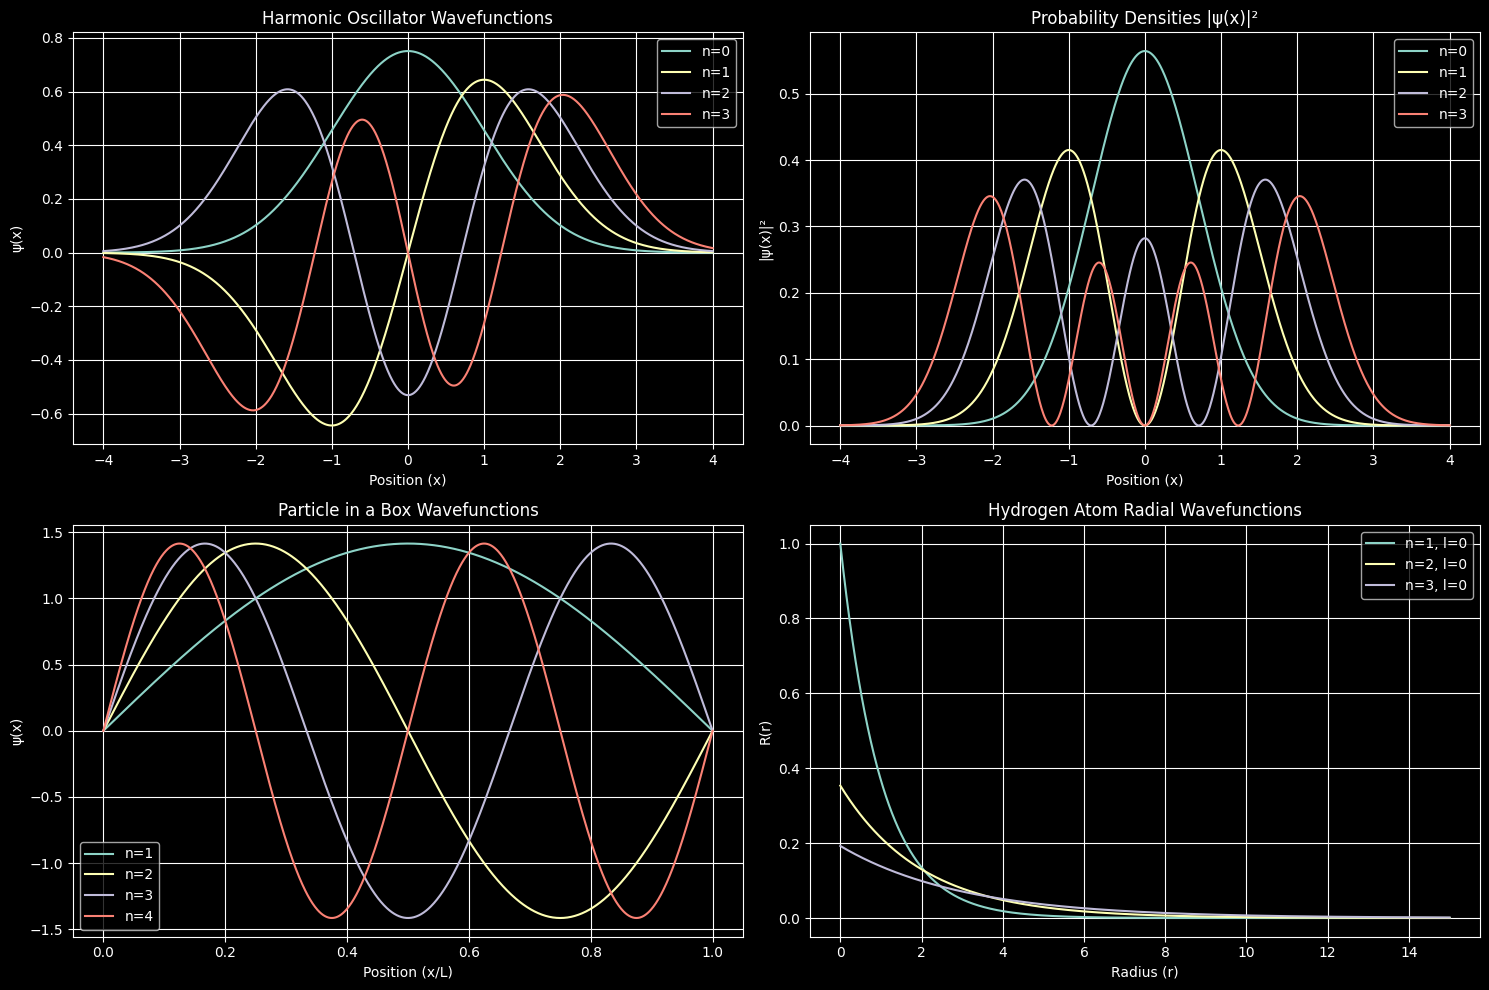

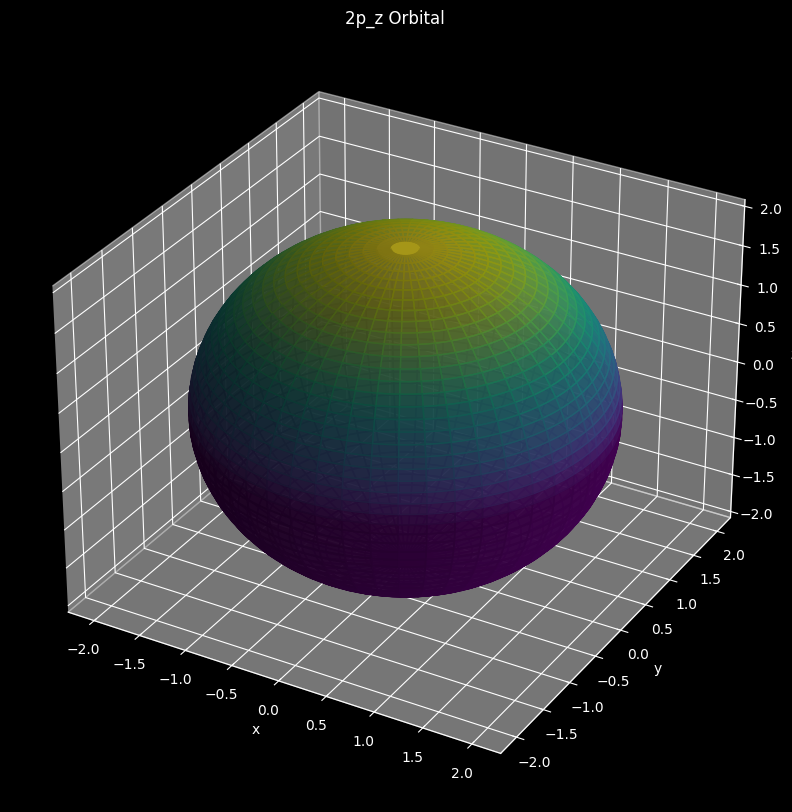

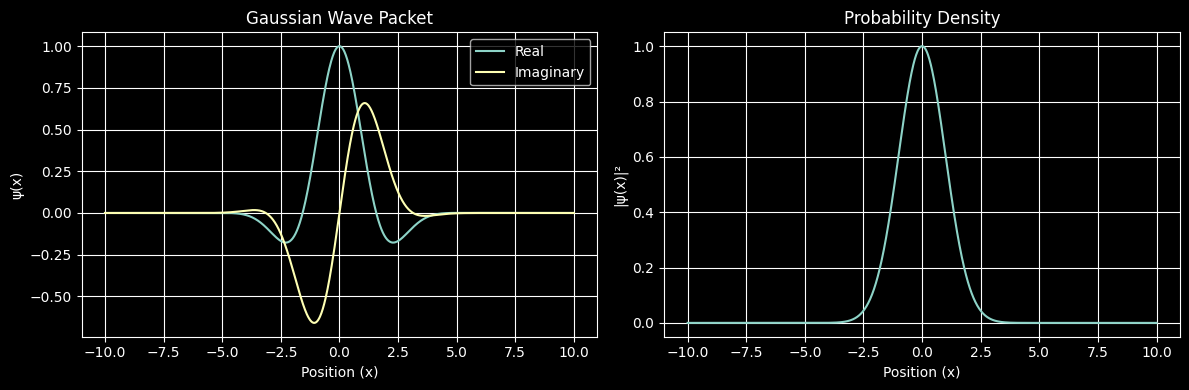

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from mpl_toolkits.mplot3d import Axes3D

class QuantumWavefunctions:
    """
    Class to demonstrate and visualize various quantum wavefunctions
    """
    
    def __init__(self):
        """Initialize constants (using atomic units)"""
        self.hbar = 1.0
        self.m = 1.0
        self.omega = 1.0
    
    def harmonic_oscillator(self, x, n):
        """
        Wavefunction for quantum harmonic oscillator
        
        Parameters:
        -----------
        x : array
            Position coordinates
        n : int
            Quantum number (energy level)
            
        Returns:
        --------
        psi : array
            Wavefunction values
        """
        # Characteristic length
        alpha = np.sqrt(self.m * self.omega / self.hbar)
        
        # Normalization constant
        N = 1.0 / np.sqrt(2**n * np.math.factorial(n)) * (alpha/np.pi)**0.25
        
        # Hermite polynomial
        H = hermite(n)
        
        # Full wavefunction
        psi = N * H(alpha * x) * np.exp(-alpha * x**2 / 2)
        
        return psi
    
    def particle_in_box(self, x, n, L=1.0):
        """
        Wavefunction for particle in a box
        
        Parameters:
        -----------
        x : array
            Position coordinates
        n : int
            Quantum number
        L : float
            Box length
            
        Returns:
        --------
        psi : array
            Wavefunction values
        """
        return np.sqrt(2/L) * np.sin(n * np.pi * x / L)
    
    def hydrogen_radial(self, r, n, l):
        """
        Radial part of hydrogen atom wavefunction
        
        Parameters:
        -----------
        r : array
            Radial coordinates
        n : int
            Principal quantum number
        l : int
            Angular momentum quantum number
            
        Returns:
        --------
        R : array
            Radial wavefunction
        """
        # Simple approximation for demonstration
        rho = 2 * r / n
        R = np.exp(-rho/2) * rho**l
        return R * np.sqrt(1/n**3)  # Approximate normalization
    
    def plot_wavefunctions(self):
        """Plot various wavefunctions and their probabilities"""
        # Set up coordinate grid
        x = np.linspace(-4, 4, 1000)
        
        # Plot harmonic oscillator states
        plt.figure(figsize=(15, 10))
        
        # Wavefunctions
        plt.subplot(221)
        for n in range(4):
            psi = self.harmonic_oscillator(x, n)
            plt.plot(x, psi, label=f'n={n}')
        
        plt.title('Harmonic Oscillator Wavefunctions')
        plt.xlabel('Position (x)')
        plt.ylabel('ψ(x)')
        plt.legend()
        plt.grid(True)
        
        # Probability densities
        plt.subplot(222)
        for n in range(4):
            psi = self.harmonic_oscillator(x, n)
            plt.plot(x, np.abs(psi)**2, label=f'n={n}')
        
        plt.title('Probability Densities |ψ(x)|²')
        plt.xlabel('Position (x)')
        plt.ylabel('|ψ(x)|²')
        plt.legend()
        plt.grid(True)
        
        # Particle in a box
        x_box = np.linspace(0, 1, 1000)
        plt.subplot(223)
        for n in range(1, 5):
            psi = self.particle_in_box(x_box, n)
            plt.plot(x_box, psi, label=f'n={n}')
            
        plt.title('Particle in a Box Wavefunctions')
        plt.xlabel('Position (x/L)')
        plt.ylabel('ψ(x)')
        plt.legend()
        plt.grid(True)
        
        # Hydrogen atom radial functions
        r = np.linspace(0, 15, 1000)
        plt.subplot(224)
        for n in range(1, 4):
            R = self.hydrogen_radial(r, n, 0)
            plt.plot(r, R, label=f'n={n}, l=0')
            
        plt.title('Hydrogen Atom Radial Wavefunctions')
        plt.xlabel('Radius (r)')
        plt.ylabel('R(r)')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()
    
    def plot_3d_orbital(self):
        """Plot a 3D visualization of hydrogen-like orbital"""
        phi = np.linspace(0, 2*np.pi, 100)
        theta = np.linspace(0, np.pi, 50)
        phi, theta = np.meshgrid(phi, theta)
        
        # 2p orbital (n=2, l=1, m=0)
        r = 2.0  # Fixed radius
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
        z = r * np.cos(theta)
        
        # Angular part of 2p_z orbital
        psi = np.cos(theta)
        
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        
        # Plot the orbital surface
        surf = ax.plot_surface(x, y, z, facecolors=plt.cm.viridis(psi),
                             alpha=0.8)
        
        ax.set_title('2p_z Orbital')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        
        plt.show()
    
    def demonstrate_uncertainty(self):
        """Demonstrate the Heisenberg uncertainty principle"""
        # Create a Gaussian wavepacket
        x = np.linspace(-10, 10, 1000)
        sigma = 1.0  # Width of the packet
        k0 = 1.0     # Central momentum
        
        psi = np.exp(-(x**2)/(4*sigma**2)) * np.exp(1j*k0*x)
        
        plt.figure(figsize=(12, 4))
        
        # Plot real and imaginary parts
        plt.subplot(121)
        plt.plot(x, psi.real, label='Real')
        plt.plot(x, psi.imag, label='Imaginary')
        plt.title('Gaussian Wave Packet')
        plt.xlabel('Position (x)')
        plt.ylabel('ψ(x)')
        plt.legend()
        plt.grid(True)
        
        # Plot probability density
        plt.subplot(122)
        plt.plot(x, np.abs(psi)**2)
        plt.title('Probability Density')
        plt.xlabel('Position (x)')
        plt.ylabel('|ψ(x)|²')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

def demonstrate_quantum_mechanics():
    qm = QuantumWavefunctions()
    
    print("Demonstrating fundamental quantum mechanical concepts:")
    print("\n1. Wavefunctions:")
    print("   - Describe quantum states")
    print("   - Complex-valued functions")
    print("   - Contain all system information")
    
    print("\n2. Key Properties:")
    print("   - Normalization: ∫|ψ|²dx = 1")
    print("   - Probability density: |ψ|²")
    print("   - Superposition principle")
    
    # Plot various wavefunctions
    qm.plot_wavefunctions()
    
    # Show 3D orbital
    qm.plot_3d_orbital()
    
    # Demonstrate uncertainty principle
    qm.demonstrate_uncertainty()

if __name__ == "__main__":
    demonstrate_quantum_mechanics()

Key Concepts about Fermi Level:

1. Definition:
   - Highest occupied energy level at T = 0K
   - Chemical potential at finite temperature
   - Determines electronic properties

2. Material Dependence:
   - Metals: Within a band
   - Semiconductors: In the band gap
   - Insulators: Middle of large band gap


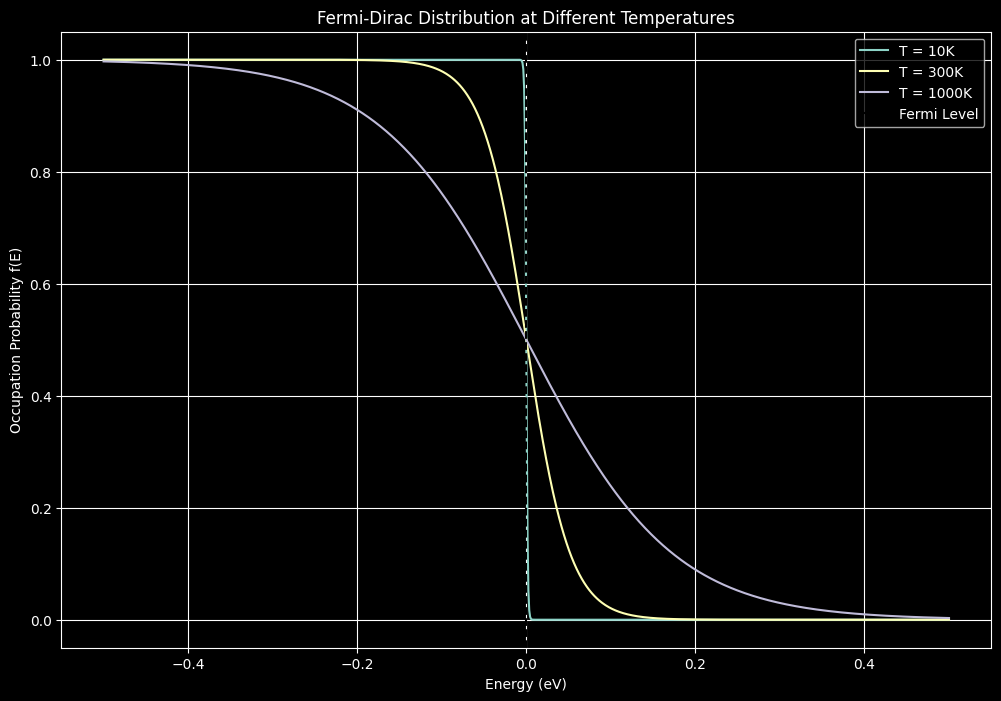

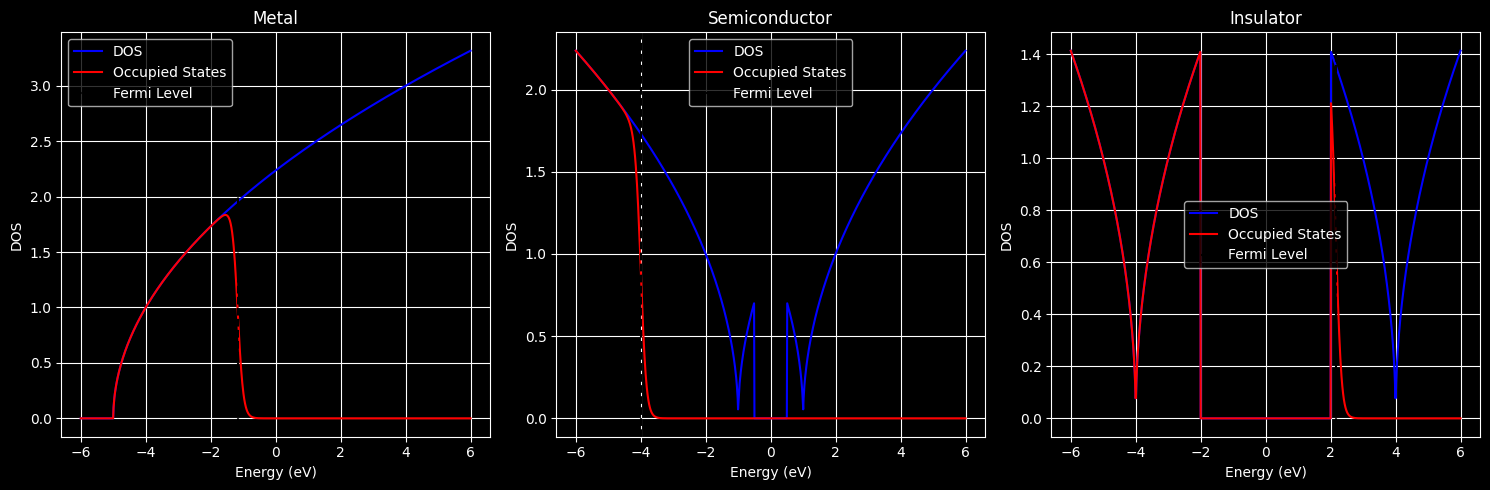

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

class FermiLevelAnalysis:
    """
    Class for analyzing Fermi level and related properties in materials
    """
    
    def __init__(self, temperature=300):
        """
        Initialize with temperature in Kelvin
        """
        self.kB = 8.617333262145e-5  # Boltzmann constant in eV/K
        self.T = temperature
        
    def fermi_dirac(self, E, E_f):
        """
        Calculate Fermi-Dirac distribution
        
        Parameters:
        -----------
        E : array
            Energy levels
        E_f : float
            Fermi level
            
        Returns:
        --------
        f : array
            Occupation probabilities
        """
        return 1.0 / (1.0 + np.exp((E - E_f)/(self.kB * self.T)))
    
    def dos_metal(self, E):
        """
        Simple density of states for a metal (parabolic band)
        """
        return np.sqrt(np.maximum(E + 5, 0))
    
    def dos_semiconductor(self, E, gap=1.0):
        """
        Density of states for a semiconductor with band gap
        """
        dos = np.zeros_like(E)
        # Valence band
        mask_v = E < -gap/2
        dos[mask_v] = np.sqrt(np.abs(E[mask_v] + gap))
        # Conduction band
        mask_c = E > gap/2
        dos[mask_c] = np.sqrt(np.abs(E[mask_c] - gap))
        return dos
    
    def find_fermi_level(self, E, dos, n_electrons):
        """
        Find Fermi level by solving for charge neutrality
        """
        def charge_imbalance(E_f):
            f = self.fermi_dirac(E, E_f)
            n = simps(dos * f, E)
            return n - n_electrons
        
        # Binary search for Fermi level
        E_min, E_max = min(E), max(E)
        while E_max - E_min > 1e-6:
            E_f = (E_min + E_max) / 2
            if charge_imbalance(E_f) > 0:
                E_max = E_f
            else:
                E_min = E_f
        
        return (E_min + E_max) / 2
    
    def plot_fermi_statistics(self):
        """
        Plot Fermi-Dirac distribution at different temperatures
        """
        E = np.linspace(-0.5, 0.5, 1000)
        E_f = 0.0
        
        plt.figure(figsize=(12, 8))
        
        # Plot at different temperatures
        temperatures = [10, 300, 1000]
        for T in temperatures:
            self.T = T
            f = self.fermi_dirac(E, E_f)
            plt.plot(E, f, label=f'T = {T}K')
            
        plt.axvline(x=E_f, color='k', linestyle='--', label='Fermi Level')
        plt.grid(True)
        plt.xlabel('Energy (eV)')
        plt.ylabel('Occupation Probability f(E)')
        plt.title('Fermi-Dirac Distribution at Different Temperatures')
        plt.legend()
        plt.show()
    
    def plot_materials_comparison(self):
        """
        Compare Fermi level in different materials
        """
        E = np.linspace(-6, 6, 1000)
        
        plt.figure(figsize=(15, 5))
        
        # Metal
        plt.subplot(131)
        dos_metal = self.dos_metal(E)
        E_f_metal = self.find_fermi_level(E, dos_metal, 5.0)
        f_metal = self.fermi_dirac(E, E_f_metal)
        
        plt.plot(E, dos_metal, 'b-', label='DOS')
        plt.plot(E, dos_metal * f_metal, 'r-', label='Occupied States')
        plt.axvline(x=E_f_metal, color='k', linestyle='--', label='Fermi Level')
        plt.title('Metal')
        plt.xlabel('Energy (eV)')
        plt.ylabel('DOS')
        plt.legend()
        plt.grid(True)
        
        # Semiconductor
        plt.subplot(132)
        dos_sc = self.dos_semiconductor(E)
        E_f_sc = self.find_fermi_level(E, dos_sc, 4.0)
        f_sc = self.fermi_dirac(E, E_f_sc)
        
        plt.plot(E, dos_sc, 'b-', label='DOS')
        plt.plot(E, dos_sc * f_sc, 'r-', label='Occupied States')
        plt.axvline(x=E_f_sc, color='k', linestyle='--', label='Fermi Level')
        plt.title('Semiconductor')
        plt.xlabel('Energy (eV)')
        plt.ylabel('DOS')
        plt.legend()
        plt.grid(True)
        
        # Insulator
        plt.subplot(133)
        dos_ins = self.dos_semiconductor(E, gap=4.0)
        E_f_ins = self.find_fermi_level(E, dos_ins, 4.0)
        f_ins = self.fermi_dirac(E, E_f_ins)
        
        plt.plot(E, dos_ins, 'b-', label='DOS')
        plt.plot(E, dos_ins * f_ins, 'r-', label='Occupied States')
        plt.axvline(x=E_f_ins, color='k', linestyle='--', label='Fermi Level')
        plt.title('Insulator')
        plt.xlabel('Energy (eV)')
        plt.ylabel('DOS')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()
        
    def calculate_carrier_density(self, E, dos, E_f):
        """
        Calculate electron and hole densities
        """
        f = self.fermi_dirac(E, E_f)
        n = simps(dos * f, E)  # electron density
        p = simps(dos * (1 - f), E)  # hole density
        return n, p

def demonstrate_fermi_level():
    """
    Demonstrate key concepts about Fermi level
    """
    analyzer = FermiLevelAnalysis()
    
    print("Key Concepts about Fermi Level:")
    print("\n1. Definition:")
    print("   - Highest occupied energy level at T = 0K")
    print("   - Chemical potential at finite temperature")
    print("   - Determines electronic properties")
    
    print("\n2. Material Dependence:")
    print("   - Metals: Within a band")
    print("   - Semiconductors: In the band gap")
    print("   - Insulators: Middle of large band gap")
    
    # Show temperature dependence
    analyzer.plot_fermi_statistics()
    
    # Compare different materials
    analyzer.plot_materials_comparison()
    
    return analyzer

if __name__ == "__main__":
    analyzer = demonstrate_fermi_level()

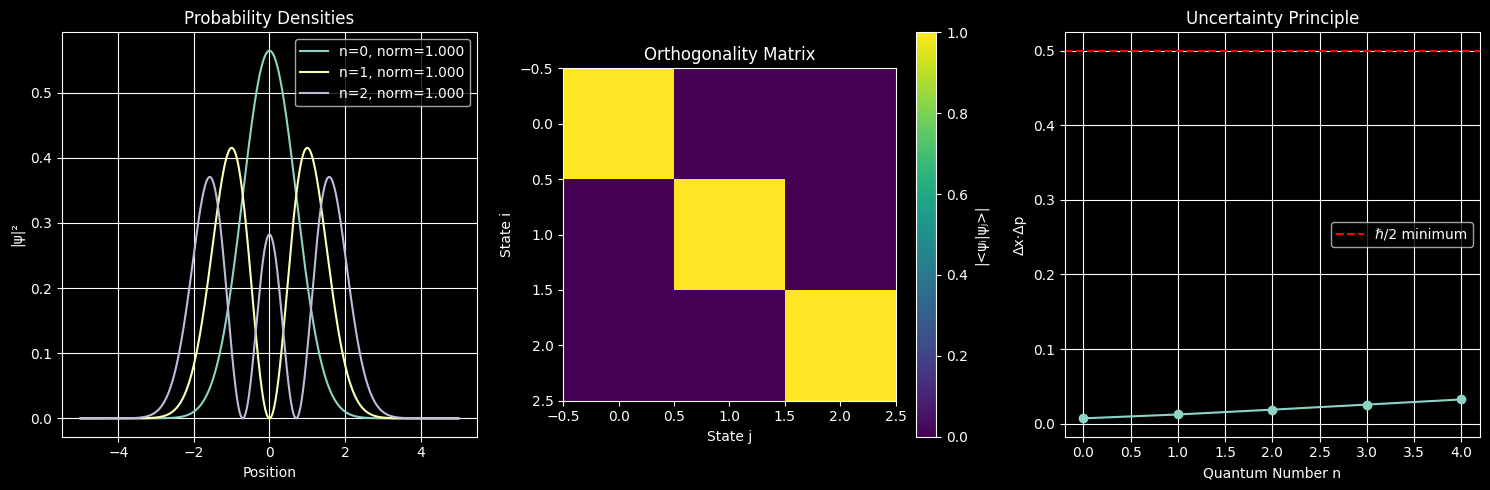


Fundamental Mathematical Properties of Wavefunctions:

1. Normalization:
   ∫|ψ|²dx = 1

2. Orthogonality:
   ∫ψᵢ*ψⱼdx = δᵢⱼ

3. Completeness:
   ∑|ψₙ⟩⟨ψₙ| = 1

4. Continuity:
   ψ and dψ/dx must be continuous

5. Single-valued:
   ψ must be single-valued

6. Square-integrable:
   ∫|ψ|²dx must be finite

7. Linearity:
   Solutions can be superposed

8. Time evolution:
   iℏ∂ψ/∂t = Hψ

9. Uncertainty principle:
   ΔxΔp ≥ ℏ/2

10. Expectation values:
   ⟨A⟩ = ∫ψ*Aψdx


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.special import hermite

class WavefunctionProperties:
    """
    Demonstrate and verify mathematical properties of wavefunctions
    """
    
    def __init__(self):
        """Initialize basic parameters"""
        self.hbar = 1.0  # Planck's constant
        self.m = 1.0    # Mass
        self.omega = 1.0 # Frequency for harmonic oscillator
        
    def check_normalization(self, psi, x):
        """
        Check if wavefunction is normalized
        
        Parameters:
        -----------
        psi : array
            Wavefunction values
        x : array
            Position coordinates
            
        Returns:
        --------
        norm : float
            Normalization integral
        """
        return simps(np.abs(psi)**2, x)
    
    def check_orthogonality(self, psi1, psi2, x):
        """
        Check orthogonality of two wavefunctions
        
        Returns:
        --------
        overlap : complex
            Overlap integral <psi1|psi2>
        """
        return simps(np.conj(psi1) * psi2, x)
    
    def expectation_value(self, operator, psi, x):
        """
        Calculate expectation value <psi|O|psi>
        
        Parameters:
        -----------
        operator : function
            Quantum operator (as function of x)
        psi : array
            Wavefunction
        x : array
            Position coordinates
            
        Returns:
        --------
        expect : float
            Expectation value
        """
        op_psi = operator(x) * psi
        return simps(np.conj(psi) * op_psi, x)
    
    def uncertainty_principle(self, psi, x):
        """
        Verify Heisenberg uncertainty principle
        
        Returns:
        --------
        dx : float
            Position uncertainty
        dp : float
            Momentum uncertainty
        product : float
            Uncertainty product (should be ≥ ℏ/2)
        """
        # Position uncertainty
        x_expect = self.expectation_value(lambda x: x, psi, x)
        x2_expect = self.expectation_value(lambda x: x**2, psi, x)
        dx = np.sqrt(x2_expect - x_expect**2)
        
        # Momentum uncertainty (using finite differences for derivative)
        dx = x[1] - x[0]
        dpsi = np.gradient(psi, dx)
        p_expect = -1j * self.hbar * self.expectation_value(lambda x: 1, dpsi, x)
        p2_expect = -self.hbar**2 * self.expectation_value(
            lambda x: 1, np.gradient(dpsi, dx), x)
        dp = np.sqrt(abs(p2_expect - p_expect**2))
        
        return dx, dp, dx*dp
    
    def demonstrate_properties(self):
        """
        Demonstrate various mathematical properties of wavefunctions
        """
        # Set up coordinate grid
        x = np.linspace(-5, 5, 1000)
        dx = x[1] - x[0]
        
        # Create some example wavefunctions (harmonic oscillator states)
        def psi_n(n, x):
            """nth harmonic oscillator state"""
            alpha = np.sqrt(self.m * self.omega / self.hbar)
            N = 1.0 / np.sqrt(2**n * np.math.factorial(n)) * (alpha/np.pi)**0.25
            H = hermite(n)
            return N * H(alpha * x) * np.exp(-alpha * x**2 / 2)
        
        # Test normalization
        plt.figure(figsize=(15, 5))
        plt.subplot(131)
        for n in range(3):
            psi = psi_n(n, x)
            norm = self.check_normalization(psi, x)
            plt.plot(x, np.abs(psi)**2, label=f'n={n}, norm={norm:.3f}')
        
        plt.title('Probability Densities')
        plt.xlabel('Position')
        plt.ylabel('|ψ|²')
        plt.legend()
        plt.grid(True)
        
        # Test orthogonality
        plt.subplot(132)
        overlap_matrix = np.zeros((3, 3), dtype=complex)
        for i in range(3):
            for j in range(3):
                psi_i = psi_n(i, x)
                psi_j = psi_n(j, x)
                overlap_matrix[i,j] = self.check_orthogonality(psi_i, psi_j, x)
                
        plt.imshow(np.abs(overlap_matrix), cmap='viridis')
        plt.colorbar(label='|<ψᵢ|ψⱼ>|')
        plt.title('Orthogonality Matrix')
        plt.xlabel('State j')
        plt.ylabel('State i')
        
        # Test uncertainty principle
        plt.subplot(133)
        uncertainty_products = []
        ns = range(5)
        for n in ns:
            psi = psi_n(n, x)
            dx, dp, product = self.uncertainty_principle(psi, x)
            uncertainty_products.append(product)
            
        plt.plot(ns, uncertainty_products, 'o-')
        plt.axhline(y=self.hbar/2, color='r', linestyle='--', 
                   label='ℏ/2 minimum')
        plt.title('Uncertainty Principle')
        plt.xlabel('Quantum Number n')
        plt.ylabel('Δx·Δp')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        return overlap_matrix, uncertainty_products

def print_mathematical_properties():
    """Print key mathematical properties of wavefunctions"""
    properties = [
        ("1. Normalization", 
         "∫|ψ|²dx = 1"),
        ("2. Orthogonality", 
         "∫ψᵢ*ψⱼdx = δᵢⱼ"),
        ("3. Completeness", 
         "∑|ψₙ⟩⟨ψₙ| = 1"),
        ("4. Continuity", 
         "ψ and dψ/dx must be continuous"),
        ("5. Single-valued", 
         "ψ must be single-valued"),
        ("6. Square-integrable", 
         "∫|ψ|²dx must be finite"),
        ("7. Linearity", 
         "Solutions can be superposed"),
        ("8. Time evolution", 
         "iℏ∂ψ/∂t = Hψ"),
        ("9. Uncertainty principle", 
         "ΔxΔp ≥ ℏ/2"),
        ("10. Expectation values", 
         "⟨A⟩ = ∫ψ*Aψdx")
    ]
    
    print("\nFundamental Mathematical Properties of Wavefunctions:")
    print("="*50)
    for prop, eq in properties:
        print(f"\n{prop}:")
        print(f"   {eq}")

if __name__ == "__main__":
    wf = WavefunctionProperties()
    overlap, uncertainties = wf.demonstrate_properties()
    print_mathematical_properties()

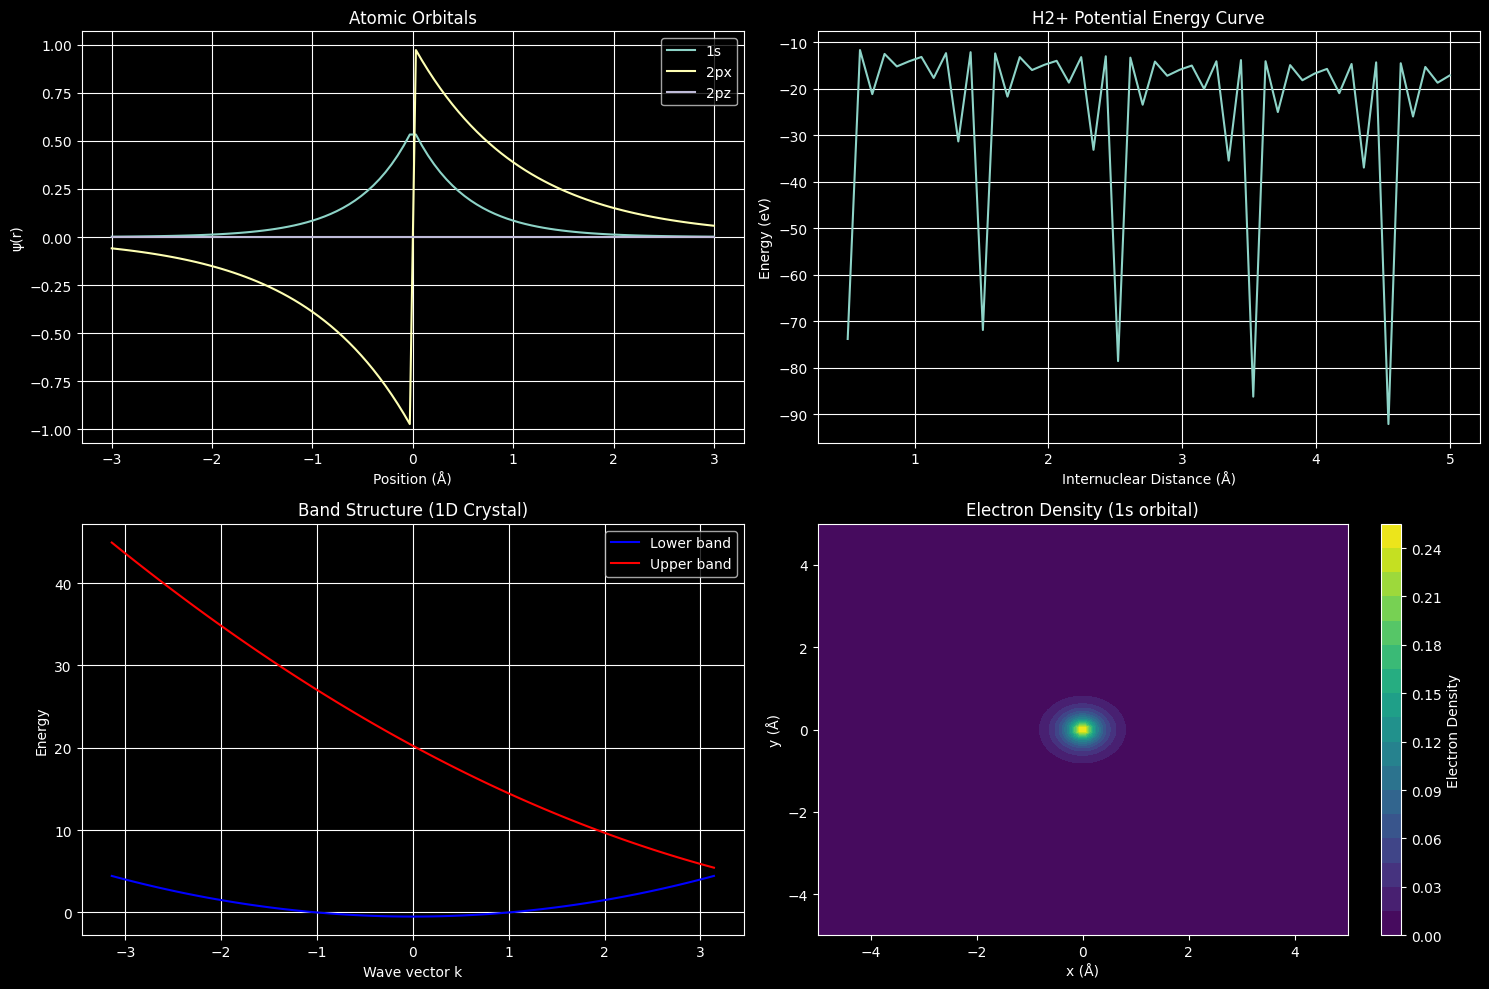


Applications in Chemistry and Materials Science:

1. Electronic Structure:
   - Atomic orbitals
   - Molecular orbitals
   - Band theory
   - Density functional theory

2. Chemical Bonding:
   - Covalent bonds
   - Ionic bonds
   - Molecular geometry
   - Bond energies

3. Spectroscopy:
   - Vibrational spectra
   - Electronic transitions
   - NMR spectroscopy
   - Photoelectron spectroscopy

4. Chemical Reactions:
   - Reaction barriers
   - Transition states
   - Reaction mechanisms
   - Catalysis


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.special import erf

class QuantumChemistry:
    """
    Class demonstrating quantum mechanical applications in chemistry
    """
    def __init__(self):
        self.bohr_radius = 0.529177  # Å
        self.hartree = 27.211396  # eV
        
    def molecular_orbital(self, x, y, z, orbital_type='1s'):
        """
        Calculate molecular orbital values
        
        Parameters:
        -----------
        x, y, z : array
            Coordinate grids
        orbital_type : str
            Type of orbital ('1s', '2px', '2py', '2pz', etc.)
            
        Returns:
        --------
        psi : array
            Orbital values
        """
        r = np.sqrt(x**2 + y**2 + z**2)
        
        if orbital_type == '1s':
            return np.exp(-r/self.bohr_radius)/np.sqrt(np.pi)
        elif orbital_type == '2px':
            return (x/r) * np.exp(-r/(2*self.bohr_radius))
        elif orbital_type == '2py':
            return (y/r) * np.exp(-r/(2*self.bohr_radius))
        elif orbital_type == '2pz':
            return (z/r) * np.exp(-r/(2*self.bohr_radius))
            
    def hydrogen_molecule(self, R, x_points=100):
        """
        Calculate H2+ molecular ion energy curve
        
        Parameters:
        -----------
        R : array
            Internuclear distances
        x_points : int
            Number of grid points
            
        Returns:
        --------
        E : array
            Energy values
        """
        # Simple LCAO calculation
        x = np.linspace(-5, 5, x_points)
        dx = x[1] - x[0]
        
        E = np.zeros_like(R)
        for i, r in enumerate(R):
            # Wavefunctions centered at ±R/2
            psi1 = np.exp(-np.abs(x + r/2))
            psi2 = np.exp(-np.abs(x - r/2))
            
            # Overlap
            S = np.trapz(psi1 * psi2, x)
            
            # Hamiltonian elements
            H11 = np.trapz(psi1 * (-0.5 * np.gradient(np.gradient(psi1, dx), dx) - 
                                  1/np.abs(x + r/2) - 1/np.abs(x - r/2)), x)
            H12 = np.trapz(psi1 * (-0.5 * np.gradient(np.gradient(psi2, dx), dx) - 
                                  1/np.abs(x + r/2) - 1/np.abs(x - r/2)), x)
            
            # Solve secular equation
            H = np.array([[H11, H12], [H12, H11]])
            S_mat = np.array([[1, S], [S, 1]])
            
            eigenvalues = eigh(H, S_mat)[0]
            E[i] = eigenvalues[0] + 1/r  # Add nuclear repulsion
            
        return E
    
    def band_structure(self, k_points=100, V0=1.0, a=1.0):
        """
        Calculate band structure for 1D crystal
        
        Parameters:
        -----------
        k_points : int
            Number of k-points
        V0 : float
            Potential strength
        a : float
            Lattice constant
            
        Returns:
        --------
        k : array
            Wave vectors
        E : array
            Energy bands
        """
        # First Brillouin zone
        k = np.linspace(-np.pi/a, np.pi/a, k_points)
        
        # Nearly free electron model
        E0 = k**2/2
        E1 = (k - 2*np.pi/a)**2/2
        
        # Gap opening
        gap = np.sqrt(E1 - E0)**2 + V0**2
        E_plus = (E0 + E1)/2 + gap/2
        E_minus = (E0 + E1)/2 - gap/2
        
        return k, np.vstack([E_minus, E_plus])
    
    def electron_density(self, psi, grid):
        """
        Calculate electron density from wavefunction
        
        Parameters:
        -----------
        psi : array
            Wavefunction values
        grid : tuple
            Coordinate grids
            
        Returns:
        --------
        rho : array
            Electron density
        """
        return np.abs(psi)**2
    
    def plot_chemistry_applications(self):
        """Visualize various chemistry applications"""
        plt.figure(figsize=(15, 10))
        
        # Molecular orbitals
        x = np.linspace(-3, 3, 100)
        y = np.zeros_like(x)
        z = np.zeros_like(x)
        
        plt.subplot(221)
        for orbital in ['1s', '2px', '2pz']:
            psi = self.molecular_orbital(x, y, z, orbital)
            plt.plot(x, psi, label=orbital)
        plt.title('Atomic Orbitals')
        plt.xlabel('Position (Å)')
        plt.ylabel('ψ(r)')
        plt.legend()
        plt.grid(True)
        
        # H2+ potential energy curve
        plt.subplot(222)
        R = np.linspace(0.5, 5, 50)
        E = self.hydrogen_molecule(R)
        plt.plot(R, E)
        plt.title('H2+ Potential Energy Curve')
        plt.xlabel('Internuclear Distance (Å)')
        plt.ylabel('Energy (eV)')
        plt.grid(True)
        
        # Band structure
        plt.subplot(223)
        k, E = self.band_structure()
        plt.plot(k, E[0], 'b-', label='Lower band')
        plt.plot(k, E[1], 'r-', label='Upper band')
        plt.title('Band Structure (1D Crystal)')
        plt.xlabel('Wave vector k')
        plt.ylabel('Energy')
        plt.legend()
        plt.grid(True)
        
        # Electron density
        plt.subplot(224)
        x = np.linspace(-5, 5, 100)
        y = np.linspace(-5, 5, 100)
        X, Y = np.meshgrid(x, y)
        Z = np.zeros_like(X)
        psi = self.molecular_orbital(X, Y, Z, '1s')
        rho = self.electron_density(psi, (X, Y, Z))
        plt.contourf(X, Y, rho, levels=20)
        plt.colorbar(label='Electron Density')
        plt.title('Electron Density (1s orbital)')
        plt.xlabel('x (Å)')
        plt.ylabel('y (Å)')
        
        plt.tight_layout()
        plt.show()

def print_applications():
    """Print overview of quantum chemistry applications"""
    applications = [
        ("1. Electronic Structure",
         ["Atomic orbitals",
          "Molecular orbitals",
          "Band theory",
          "Density functional theory"]),
        ("2. Chemical Bonding",
         ["Covalent bonds",
          "Ionic bonds",
          "Molecular geometry",
          "Bond energies"]),
        ("3. Spectroscopy",
         ["Vibrational spectra",
          "Electronic transitions",
          "NMR spectroscopy",
          "Photoelectron spectroscopy"]),
        ("4. Chemical Reactions",
         ["Reaction barriers",
          "Transition states",
          "Reaction mechanisms",
          "Catalysis"])
    ]
    
    print("\nApplications in Chemistry and Materials Science:")
    print("="*50)
    for category, examples in applications:
        print(f"\n{category}:")
        for ex in examples:
            print(f"   - {ex}")

if __name__ == "__main__":
    qc = QuantumChemistry()
    qc.plot_chemistry_applications()
    print_applications()

/tmp/ipykernel_68740/1117694164.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  H[i,j,j+1] = -1.0 * np.exp(1j*k[i])  # Hopping term
/tmp/ipykernel_68740/1117694164.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  H[i,j+1,j] = -1.0 * np.exp(-1j*k[i])  # Hermitian conjugate


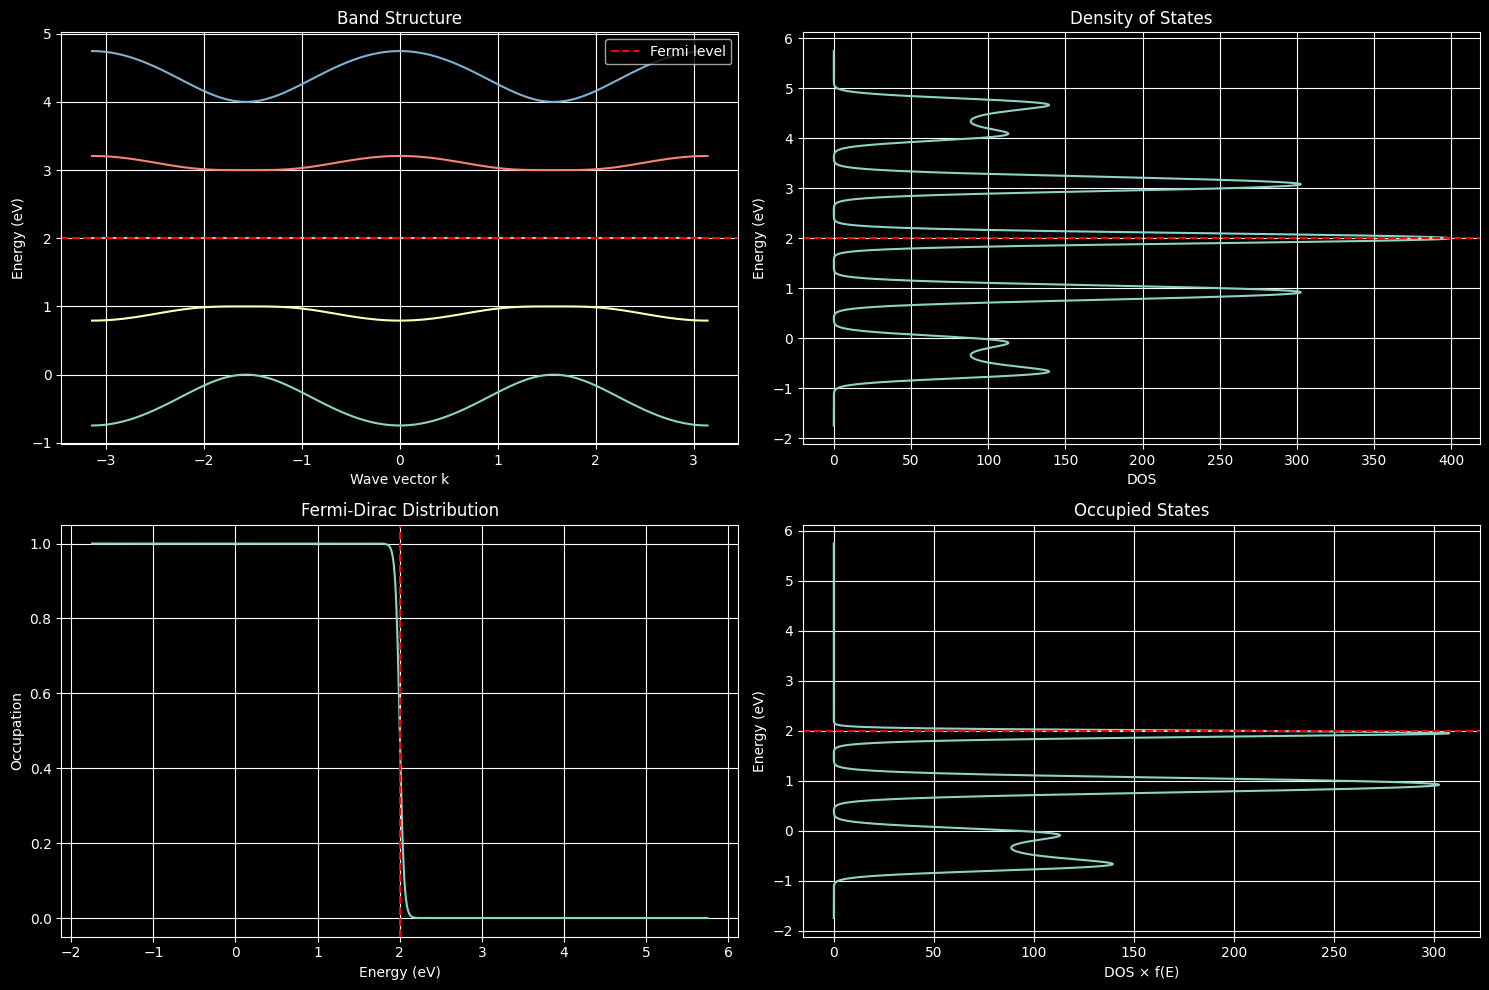


Key Connections in Electronic Structure:

1. Wavefunctions → DOS:
   - DOS(E) = Σ_k δ(E - E_k)
   - States per energy interval
   - Band structure determines DOS

2. DOS → Fermi Level:
   - n = ∫ DOS(E) f(E) dE
   - Fermi level from electron count
   - Temperature dependence

3. Fermi Level → Wavefunctions:
   - Occupation of states
   - Electronic properties
   - Transport phenomena

4. Combined Effects:
   - Band filling
   - Material properties
   - Electronic structure


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.integrate import simps

class QuantumConnections:
    """
    Demonstrate connections between wavefunctions, DOS, and Fermi level
    """
    def __init__(self):
        self.kB = 8.617333262145e-5  # Boltzmann constant in eV/K
        self.temperature = 300  # Temperature in K
        
    def solve_band_structure(self, k_points=100, n_bands=5):
        """
        Calculate band structure from tight binding model
        
        Returns:
        --------
        k : array
            Wave vectors
        E : array
            Energies for each band
        psi : array
            Wavefunctions
        """
        # Create k-points in first Brillouin zone
        k = np.linspace(-np.pi, np.pi, k_points)
        
        # Tight binding Hamiltonian
        H = np.zeros((k_points, n_bands, n_bands))
        for i in range(k_points):
            # Create tight binding matrix for each k-point
            for j in range(n_bands):
                H[i,j,j] = j  # On-site energy
                if j < n_bands-1:
                    H[i,j,j+1] = -1.0 * np.exp(1j*k[i])  # Hopping term
                    H[i,j+1,j] = -1.0 * np.exp(-1j*k[i])  # Hermitian conjugate
        
        # Solve eigenvalue problem for each k-point
        E = np.zeros((k_points, n_bands))
        psi = np.zeros((k_points, n_bands, n_bands), dtype=complex)
        
        for i in range(k_points):
            E[i,:], psi[i,:,:] = eigh(H[i])
            
        return k, E, psi
    
    def calculate_dos(self, energies, broadening=0.1, energy_points=1000):
        """
        Calculate DOS from energy eigenvalues
        
        Returns:
        --------
        E : array
            Energy points
        dos : array
            Density of states
        """
        # Flatten band energies
        E_flat = energies.flatten()
        
        # Create energy grid
        E = np.linspace(np.min(E_flat)-1, np.max(E_flat)+1, energy_points)
        
        # Calculate DOS using Gaussian broadening
        dos = np.zeros_like(E)
        for e in E_flat:
            dos += np.exp(-(E - e)**2 / (2 * broadening**2))
            
        dos /= np.sqrt(2 * np.pi * broadening**2)
        return E, dos
    
    def fermi_dirac(self, E, E_f):
        """Calculate Fermi-Dirac distribution"""
        return 1.0 / (1.0 + np.exp((E - E_f)/(self.kB * self.temperature)))
    
    def find_fermi_level(self, E, dos, n_electrons, tolerance=1e-6):
        """Find Fermi level using bisection method"""
        E_min, E_max = np.min(E), np.max(E)
        
        while E_max - E_min > tolerance:
            E_f = (E_min + E_max) / 2
            n = simps(dos * self.fermi_dirac(E, E_f), E)
            
            if n > n_electrons:
                E_max = E_f
            else:
                E_min = E_f
                
        return (E_min + E_max) / 2
    
    def electron_density(self, psi, E, E_f):
        """Calculate electron density from wavefunctions"""
        occupation = self.fermi_dirac(E, E_f)
        density = np.sum(np.abs(psi)**2 * occupation[:, np.newaxis], axis=0)
        return density
    
    def demonstrate_connections(self):
        """Visualize connections between concepts"""
        # Calculate band structure
        k, E, psi = self.solve_band_structure()
        
        # Calculate DOS
        E_dos, dos = self.calculate_dos(E)
        
        # Find Fermi level (assume half-filling)
        n_electrons = E.size // 2
        E_f = self.find_fermi_level(E_dos, dos, n_electrons)
        
        # Plot results
        plt.figure(figsize=(15, 10))
        
        # Band structure
        plt.subplot(221)
        for band in range(E.shape[1]):
            plt.plot(k, E[:,band])
        plt.axhline(y=E_f, color='r', linestyle='--', label='Fermi level')
        plt.title('Band Structure')
        plt.xlabel('Wave vector k')
        plt.ylabel('Energy (eV)')
        plt.legend()
        plt.grid(True)
        
        # DOS
        plt.subplot(222)
        plt.plot(dos, E_dos)
        plt.axhline(y=E_f, color='r', linestyle='--', label='Fermi level')
        plt.title('Density of States')
        plt.xlabel('DOS')
        plt.ylabel('Energy (eV)')
        plt.grid(True)
        
        # Fermi-Dirac distribution
        plt.subplot(223)
        f = self.fermi_dirac(E_dos, E_f)
        plt.plot(E_dos, f)
        plt.axvline(x=E_f, color='r', linestyle='--', label='Fermi level')
        plt.title('Fermi-Dirac Distribution')
        plt.xlabel('Energy (eV)')
        plt.ylabel('Occupation')
        plt.grid(True)
        
        # Occupied DOS
        plt.subplot(224)
        plt.plot(dos * f, E_dos)
        plt.axhline(y=E_f, color='r', linestyle='--', label='Fermi level')
        plt.title('Occupied States')
        plt.xlabel('DOS × f(E)')
        plt.ylabel('Energy (eV)')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

def print_connections():
    """Print key connections between concepts"""
    connections = [
        ("1. Wavefunctions → DOS",
         ["DOS(E) = Σ_k δ(E - E_k)",
          "States per energy interval",
          "Band structure determines DOS"]),
        ("2. DOS → Fermi Level",
         ["n = ∫ DOS(E) f(E) dE",
          "Fermi level from electron count",
          "Temperature dependence"]),
        ("3. Fermi Level → Wavefunctions",
         ["Occupation of states",
          "Electronic properties",
          "Transport phenomena"]),
        ("4. Combined Effects",
         ["Band filling",
          "Material properties",
          "Electronic structure"])
    ]
    
    print("\nKey Connections in Electronic Structure:")
    print("="*50)
    for category, items in connections:
        print(f"\n{category}:")
        for item in items:
            print(f"   - {item}")

if __name__ == "__main__":
    qc = QuantumConnections()
    qc.demonstrate_connections()
    print_connections()

/tmp/ipykernel_68740/523650999.py:50: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp((E - E_f)/(self.kB * T)))
/tmp/ipykernel_68740/523650999.py:69: RuntimeWarning: overflow encountered in cosh
  df_dE = -(1/(4*self.kB*T)) * 1/np.cosh((E - E_f)/(2*self.kB*T))**2
/tmp/ipykernel_68740/523650999.py:69: RuntimeWarning: overflow encountered in square
  df_dE = -(1/(4*self.kB*T)) * 1/np.cosh((E - E_f)/(2*self.kB*T))**2


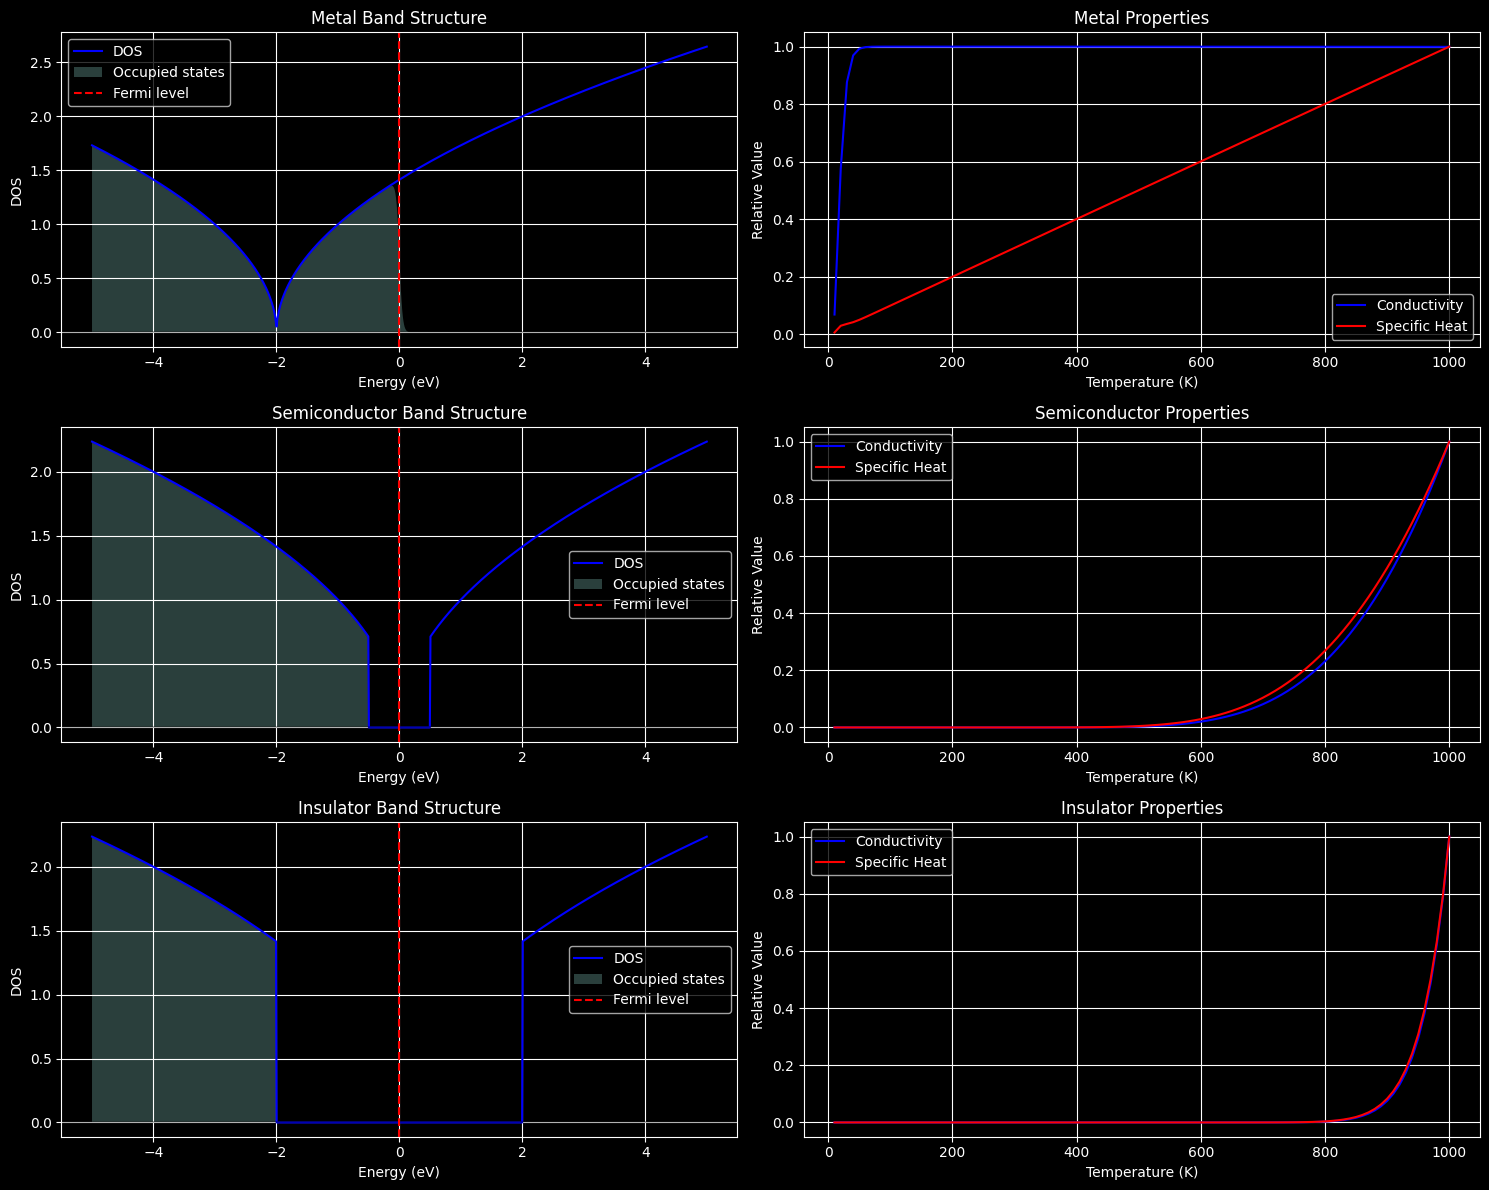


Effects of Fermi Level Position:

1. Metals:
   - Fermi level inside a band
   - High conductivity
   - Temperature-independent conductivity
   - Linear specific heat

2. Semiconductors:
   - Fermi level in small band gap
   - Temperature-activated conductivity
   - Exponential temperature dependence
   - Dopant-controlled properties

3. Insulators:
   - Fermi level in large band gap
   - Very low conductivity
   - Strong temperature dependence
   - High activation energy

4. Material Properties:
   - Electronic conductivity
   - Thermal conductivity
   - Optical properties
   - Chemical reactivity


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

class FermiLevelProperties:
    """
    Demonstrate how Fermi level position affects material properties
    """
    def __init__(self):
        self.kB = 8.617333262145e-5  # Boltzmann constant in eV/K
        
    def create_band_structure(self, material_type='metal', band_gap=1.0, E_points=1000):
        """
        Create band structure for different materials
        
        Parameters:
        -----------
        material_type : str
            'metal', 'semiconductor', or 'insulator'
        band_gap : float
            Band gap energy (eV)
        """
        # Energy range
        E = np.linspace(-5, 5, E_points)
        
        # DOS for different materials
        if material_type == 'metal':
            # Continuous DOS through Fermi level
            dos = np.sqrt(np.abs(E + 2))
            E_fermi = 0.0
            
        elif material_type == 'semiconductor':
            # Small band gap
            dos = np.zeros_like(E)
            gap_region = np.abs(E) < band_gap/2
            dos[~gap_region] = np.sqrt(np.abs(E[~gap_region]))
            E_fermi = 0.0
            
        else:  # insulator
            # Large band gap
            dos = np.zeros_like(E)
            gap_region = np.abs(E) < band_gap/2
            dos[~gap_region] = np.sqrt(np.abs(E[~gap_region]))
            E_fermi = 0.0
            
        return E, dos, E_fermi
    
    def fermi_dirac(self, E, E_f, T):
        """Calculate Fermi-Dirac distribution"""
        return 1.0 / (1.0 + np.exp((E - E_f)/(self.kB * T)))
    
    def calculate_conductivity(self, E, dos, E_f, T):
        """
        Calculate relative conductivity
        
        Parameters:
        -----------
        E : array
            Energy values
        dos : array
            Density of states
        E_f : float
            Fermi level
        T : float
            Temperature (K)
        """
        # Conductivity proportional to states near Fermi level
        f = self.fermi_dirac(E, E_f, T)
        df_dE = -(1/(4*self.kB*T)) * 1/np.cosh((E - E_f)/(2*self.kB*T))**2
        
        # Conductivity from states near Fermi level
        sigma = -simps(dos * df_dE, E)
        return sigma
    
    def calculate_thermal_properties(self, E, dos, E_f, T):
        """Calculate thermal properties"""
        f = self.fermi_dirac(E, E_f, T)
        
        # Specific heat proportional to DOS at Fermi level
        df_dT = (E - E_f)/(self.kB * T**2) * f * (1 - f)
        C = simps(E * dos * df_dT, E)
        
        return C
    
    def demonstrate_properties(self):
        """Visualize how Fermi level affects properties"""
        materials = ['metal', 'semiconductor', 'insulator']
        band_gaps = [0.0, 1.0, 4.0]
        temperatures = np.linspace(10, 1000, 100)
        
        plt.figure(figsize=(15, 12))
        
        # Band structure and DOS
        for i, (material, gap) in enumerate(zip(materials, band_gaps)):
            plt.subplot(3, 2, 2*i + 1)
            
            E, dos, E_f = self.create_band_structure(material, gap)
            f_room = self.fermi_dirac(E, E_f, 300)
            
            # Plot DOS and occupied states
            plt.plot(E, dos, 'b-', label='DOS')
            plt.fill_between(E, 0, dos * f_room, alpha=0.3, 
                           label='Occupied states')
            plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
            plt.axvline(x=E_f, color='r', linestyle='--', 
                       label='Fermi level')
            
            plt.title(f'{material.capitalize()} Band Structure')
            plt.xlabel('Energy (eV)')
            plt.ylabel('DOS')
            plt.legend()
            plt.grid(True)
            
            # Temperature dependence
            plt.subplot(3, 2, 2*i + 2)
            
            # Calculate properties vs temperature
            sigma = np.zeros_like(temperatures)
            C = np.zeros_like(temperatures)
            
            for j, T in enumerate(temperatures):
                sigma[j] = self.calculate_conductivity(E, dos, E_f, T)
                C[j] = self.calculate_thermal_properties(E, dos, E_f, T)
            
            # Normalize for comparison
            sigma /= np.max(np.abs(sigma))
            C /= np.max(np.abs(C))
            
            plt.plot(temperatures, sigma, 'b-', label='Conductivity')
            plt.plot(temperatures, C, 'r-', label='Specific Heat')
            
            plt.title(f'{material.capitalize()} Properties')
            plt.xlabel('Temperature (K)')
            plt.ylabel('Relative Value')
            plt.legend()
            plt.grid(True)
        
        plt.tight_layout()
        plt.show()

def print_fermi_effects():
    """Print effects of Fermi level position"""
    effects = [
        ("1. Metals",
         ["Fermi level inside a band",
          "High conductivity",
          "Temperature-independent conductivity",
          "Linear specific heat"]),
        ("2. Semiconductors",
         ["Fermi level in small band gap",
          "Temperature-activated conductivity",
          "Exponential temperature dependence",
          "Dopant-controlled properties"]),
        ("3. Insulators",
         ["Fermi level in large band gap",
          "Very low conductivity",
          "Strong temperature dependence",
          "High activation energy"]),
        ("4. Material Properties",
         ["Electronic conductivity",
          "Thermal conductivity",
          "Optical properties",
          "Chemical reactivity"])
    ]
    
    print("\nEffects of Fermi Level Position:")
    print("="*50)
    for category, items in effects:
        print(f"\n{category}:")
        for item in items:
            print(f"   - {item}")

if __name__ == "__main__":
    fp = FermiLevelProperties()
    fp.demonstrate_properties()
    print_fermi_effects()